In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
loan = pd.read_csv("LoansData.csv")
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
loan['Interest.Rate']=loan['Interest.Rate'].str.replace("%","").astype(float)
loan['Loan.Length']=loan['Loan.Length'].str.split(' ').str[0].astype(float)
loan['Debt.To.Income.Ratio']=loan['Debt.To.Income.Ratio'].str.split("%").str[0].astype(float)


In [5]:
loan.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [6]:
loan.dropna(inplace=True)

In [7]:
#BP_1-a :
'''lets split the df into two groups based on interest rate'''
loan['Interest.Rate'].mean()
loan_a = loan.loc[(loan['Interest.Rate']<loan['Interest.Rate'].mean()),['Interest.Rate','Amount.Requested']]
loan_a.reset_index(inplace=True)
loan_a.drop(columns='index',inplace=True)
loan_b = loan.loc[(loan['Interest.Rate']>loan['Interest.Rate'].mean()),['Interest.Rate','Amount.Requested']]
loan_b.reset_index(inplace=True)
loan_b.drop(columns='index',inplace=True)


In [8]:
from scipy.stats import ttest_ind

a1= ttest_ind(loan_a['Amount.Requested'],loan_b['Amount.Requested'])

print(a1.pvalue)
if (a1.pvalue)<.05:
    print('Interest Rate is varied with loan amount')
else:
    print("Interest Rate is not varied with loan amount")


1.4683548582367646e-24
Interest Rate is varied with loan amount


In [9]:
#BP_1-b :
from scipy.stats import pearsonr

a1=pearsonr(loan['Loan.Length'],loan['Interest.Rate'])
print(a1)
if (a1.pvalue)<.05:
    if (a1.statistic)>0:
        print("Interest Rate is proportional to loan length")
    else:
        print("Interest Rate is inversely proportional to loan length")
    
else:
    print("Loan Length is not directly effecting interest rate")

PearsonRResult(statistic=0.4250573823094766, pvalue=1.7938010673370282e-106)
Interest Rate is proportional to loan length


In [10]:
#BP_1-c :
from scipy.stats import f_oneway

categorical_col = loan['Loan.Purpose']
continuous_col = loan['Interest.Rate']

categories = [continuous_col[categorical_col == category] for category in categorical_col.unique()]

pvalue = f_oneway(*categories)[1]

if pvalue<.05:
    print("Interest Rate Varies for diffrent purpose of loan")
else:
    print("Interest Rate does not Varies for diffrent purpose of loan")


Interest Rate Varies for diffrent purpose of loan


In [11]:
#BP_1-d:
loan['FICO.Range']=loan['FICO.Range'].str[:3]


In [12]:
categorical_col = loan['Home.Ownership']
continuous_col = loan['FICO.Range']

categories = [continuous_col[categorical_col == category] for category in categorical_col.unique()]

pvalue = f_oneway(*categories)[1]
print(pvalue)
if pvalue<.05:
    print("There is relationship between FICO scores and Home Ownership")
else:
    print("There is no relationship between FICO scores and Home Ownership")

3.2682005447315283e-13
There is relationship between FICO scores and Home Ownership


In [37]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(loan['Home.Ownership'],loan['FICO.Range'])
chi2, p_value, dof, expected = chi2_contingency(contigency_table)
if p_value<.05:
    print("There is relationship between FICO scores and Home Ownership")
else:
    print("There is no relationship between FICO scores and Home Ownership")

There is relationship between FICO scores and Home Ownership


In [13]:
#BP_2:
bp2 = pd.read_csv("Price_Quotes.csv")
bp2.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [14]:
print(bp2["Barry_Price"].mean())
print(bp2["Mary_Price"].mean())

124.33333333333333
114.75


In [15]:
#from scipy.stats import ttest_rel

pvalue = ttest_ind(bp2.Barry_Price,bp2.Mary_Price)

if pvalue[1]<.05:
    print("There is significant diff in average of price provided")
else:
    print("There is no diff in average of price provided")

There is no diff in average of price provided


In [16]:
#BP_3:
t_facility = pd.read_csv("Treatment_Facility.csv")
t_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [17]:
t_facility.rename(columns={'VAR4':"TRFF",'VAR5':'CI'}, inplace=True)

In [18]:
prior_t = t_facility.loc[t_facility['Reengineer']=='Prior',['CI']]
post_t = t_facility.loc[t_facility['Reengineer']=='Post',['CI']]

In [19]:
A3= ttest_ind(prior_t,post_t)

if (A3[1]<.05):
    print("Yes the critical incidence rate did improve")
else:
    print("There is not much evidence that the critical incidence rate improved")

There is not much evidence that the critical incidence rate improved


In [20]:
#BP_4:
prioty_assesmt = pd.read_csv("Priority_Assessment.csv")
prioty_assesmt

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [21]:
high_p = prioty_assesmt.loc[prioty_assesmt.Priority =='High',['Days']]
medium_p = prioty_assesmt.loc[prioty_assesmt.Priority =='Medium',['Days']]
low_p = prioty_assesmt.loc[prioty_assesmt.Priority =='Low',['Days']]
print("high",high_p.mean(),"medium",medium_p.mean(),"low",low_p.mean())

high Days    3.02362
dtype: float64 medium Days    2.5
dtype: float64 low Days    4.228358
dtype: float64


In [22]:
#here we will check first if high priority on 1samp basis when compared to 2.5. and ind_sample test on medium priority when compared to low priority

In [23]:
ttest_ind(high_p,medium_p)

Ttest_indResult(statistic=array([0.92523941]), pvalue=array([0.35523088]))

In [24]:
ttest_ind(medium_p,low_p)

Ttest_indResult(statistic=array([-2.36908221]), pvalue=array([0.01843701]))

In [25]:
#from the above result we see that medium priority has less mean days compared to high priority. And days taken by medium priority over low priotity can not be concluded if it takes less time or not.

In [26]:
#BP_5:

films = pd.read_csv("Films.csv")
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [27]:
films.drop(columns = '_rowstate_', inplace=True)

In [28]:
films.dropna(inplace=True)

In [29]:
films['Gender']=films['Gender'].replace(['1','2'],['Male','Female'])
films['Marital_Status']=films['Marital_Status'].replace(['1','2'],['Married','Single'])

In [ ]:
# since customer service satisafaction has to done with services rather than demographic profile:-- the factors affecting customer level satisfaction are = sinage,parking,clean

In [85]:
satisfaction = films[['Sinage','Parking','Clean','Overall']]

In [95]:
satisfaction.corr()

,Sinage,Parking,Clean,Overall
Sinage,1.000000,0.470412,0.365028,0.410689
Parking,0.470412,1.000000,0.457018,0.547717
Clean,0.365028,0.457018,1.000000,0.385523
Overall,0.410689,0.547717,0.385523,1.000000


Hence overall is directly related to sinage,parking and clean. Higher the value>> higher the satisfaction

In [ ]:
#Here 6 types of demographic data are available -namely: movie name, gender,maritial status, age_group,income and hear about

In [104]:
#on the basis of movie name:
print(films['Movie'].value_counts())

#on the basis of gender:
print(films['Gender'].value_counts())

#on the basis of Marital Status:
print(films['Marital_Status'].value_counts())

#on the basis of age_group:
print(films['Age'].value_counts())

#on the basis of gender:
print(films['Gender'].value_counts())

#on the basis of Income:
print(films['Income'].value_counts())

#on the basis of Hear_about:
print(films['Hear_About'].value_counts())

Movie
Willy Wonka                142
Ferris Buellers Day Off    128
Old School                  31
Name: count, dtype: int64
Gender
Female    195
Male      106
Name: count, dtype: int64
Marital_Status
Single     208
Married     91
Slngle       2
Name: count, dtype: int64
Age
2.0    164
3.0    108
1.0     22
4.0      7
Name: count, dtype: int64
Gender
Female    195
Male      106
Name: count, dtype: int64
Income
1.0    135
3.0     86
2.0     80
Name: count, dtype: int64
Hear_About
5      212
4       39
1       19
3       13
2       11
2,5      2
4,5      1
1,5      1
5,4      1
3,5      1
3,4      1
Name: count, dtype: Int64


In [52]:
print(films['Overall'].mean())
print(np.percentile(films['Overall'], 25))
print(np.percentile(films['Overall'], 75))

1.6212624584717608
1.0
2.0


Text(0.5, 1.0, 'Boxenplot of Category Counts')

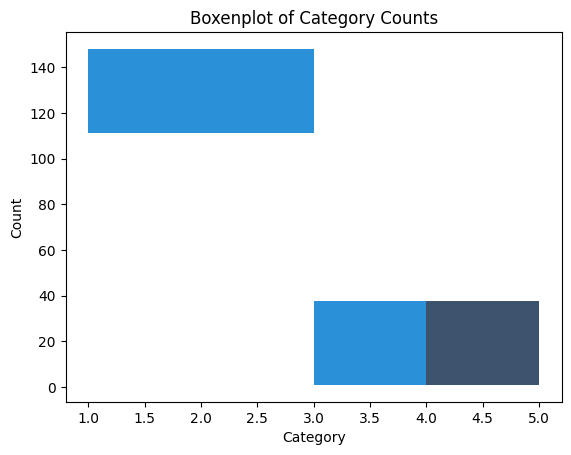

In [64]:
category_counts = films['Overall'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

sns.histplot(x='Category', y='Count', data=category_counts)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Boxenplot of Category Counts')

from the above we can conclude that the overall level of customer satisfaction is mostly on the lower side i.e. 1 or 2

In [71]:
films['Hear_About']=films['Hear_About'].convert_dtypes(str)

In [80]:
print("media1 = ",films.loc[films['Hear_About'].str.contains(("1")),'Hear_About'].count())
print("media2 = ",films.loc[films['Hear_About'].str.contains(("2")),'Hear_About'].count())
print("media3 = ",films.loc[films['Hear_About'].str.contains(("3")),'Hear_About'].count())
print("media4 = ",films.loc[films['Hear_About'].str.contains(("4")),'Hear_About'].count())
print("media5 = ",films.loc[films['Hear_About'].str.contains(("5")),'Hear_About'].count())

media1 =  20
media2 =  13
media3 =  15
media4 =  42
media5 =  218


Hence media outlet 5 i.e. word of mouth was the best result.